# Accuracy and Related Metrics: A Practical Guide

*Level: Undergrad clarity (let me know if you want more/less detail!)*

---

## 1. What is “Accuracy”?
- **Idea:** “How often am I correct?”
- **Math (population):**
  
  $\text{Acc} = P(\hat{Y} = Y) = \mathbb{E}[\mathbf{1}{\{\hat{Y} = Y\}}]$
- **Math (on a test set of $n$ items):**
  
  $\hat{\text{Acc}} = \frac{1}{n} \sum_{i=1}^n \mathbf{1}{\{\hat{y}^i = y^i\}}$
  
  This is the *empirical accuracy* (the sample mean of correct/incorrect indicators).

---

## 2. Confusion Matrix (Binary Classification)
Suppose the true class is Positive (1) or Negative (0) and the model predicts Positive/Negative.

|                | Pred = Positive | Pred = Negative |
|----------------|-----------------|-----------------|
| **True = Pos** | TP (true pos)   | FN (false neg)  |
| **True = Neg** | FP (false pos)  | TN (true neg)   |

- **Totals:**
  - Positives: $P = TP + FN$
  - Negatives: $N = TN + FP$
  - All samples: $T = P + N = TP + TN + FP + FN$

- **Accuracy (binary):**
  
  $\hat{\text{Acc}} = \frac{TP + TN}{TP + TN + FP + FN}$

- **Error rate:** $1 - \text{Accuracy} = \frac{FP + FN}{T}$

---

## 3. Core Related Rates
- **Recall / Sensitivity / TPR:** $\frac{TP}{TP + FN}$
- **Specificity / TNR:** $\frac{TN}{TN + FP}$
- **Precision / PPV:** $\frac{TP}{TP + FP}$
- **FPR:** $\frac{FP}{FP + TN} = 1 - \text{Specificity}$
- **FNR:** $\frac{FN}{FN + TP} = 1 - \text{Recall}$
- **F1-score:** harmonic mean of Precision & Recall
  
  $F_1 = \frac{2 \cdot \text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$
- **Balanced Accuracy (binary):** average of TPR and TNR
  
  $BA = \frac{TPR + TNR}{2}$
  
  (Helps when classes are imbalanced.)

---

## 4. Statistical View of Accuracy (Confidence & Significance)
- Each prediction is a Bernoulli(Acc) “success.”
- With $n$ independent test points, the number of correct predictions is $\text{Binomial}(n, p)$ with $p =$ true accuracy.
- **Point estimate:** $\hat{p} = \text{correct}/n$
- **Standard error (approx):** $SE \approx \sqrt{\hat{p}(1-\hat{p})/n}$
- **Approx 95% CI (normal):** $\hat{p} \pm 1.96 \cdot SE$
- **Wilson 95% CI (more reliable for small $n$):**
  
  $\frac{\hat{p} + \frac{z^2}{2n} \pm z \sqrt{\frac{\hat{p}(1-\hat{p})}{n} + \frac{z^2}{4n^2}}}{1 + \frac{z^2}{n}},\ z=1.96$

- **Comparing two classifiers on the SAME test set:**
  - Use McNemar’s test on the $2\times2$ of disagreements.
  - Let $b$ = # samples where A is wrong and B is right
  - $c$ = # samples where A is right and B is wrong
  - Test statistic: $\chi^2 = \frac{(|b-c|-1)^2}{b+c}$ (approx $\chi^2$ with 1 df). Significant $\Rightarrow$ different error profiles.

---

## 5. Thresholds, Prevalence, and Why Accuracy Can Mislead
- For a score $s(x)$ with threshold $\tau$ (predict Positive if $s \geq \tau$):
- Let $\pi = P(Y=1)$ (class prevalence). Then:
  
  $\text{Acc}(\tau) = \pi \cdot TPR(\tau) + (1-\pi) \cdot TNR(\tau)$
- If data are imbalanced (say $\pi=0.01$), a dumb “always Negative” classifier gets 99% accuracy — but TPR = 0 (it never finds positives).
- Use balanced accuracy, recall, precision, PR curves, ROC/TPR–FPR, or cost-sensitive metrics in such cases.
- **Youden’s J:** $TPR - FPR$ maximizes balanced performance; maximizing plain accuracy effectively weights TPR vs TNR by class prevalence.

---

## 6. Loss-based Foundation (Core ML Math)
- **0–1 loss:** $\ell(\hat{y},y) = 1{\{\hat{y} \neq y\}}$
- **Risk (population):**
  
  $R(f) = \mathbb{E}[\ell(f(X), Y)] = 1 - \text{Acc}$
- **Bayes-optimal classifier:**
  
  $f^*(x) = \arg\max_y P(Y=y|X=x)$
  
  minimizes 0–1 risk and maximizes accuracy in expectation.
- **Empirical risk minimization (ERM):** choose $f$ to minimize average 0–1 loss on training data (usually approximated via surrogate losses like logistic/hinge for tractability).

---

## 7. Label Noise Effect (Important in Practice)
- If labels are flipped symmetrically with rate $\eta$ (each label wrong with prob $\eta$), the measured accuracy $\hat{\text{Acc}}_{noisy}$ relates to true accuracy $\text{Acc}_{true}$ by:
  
  $\hat{\text{Acc}}_{noisy} = (1-\eta)\cdot \text{Acc}_{true} + \eta \cdot (1-\text{Acc}_{true}) = (1-2\eta)\text{Acc}_{true} + \eta$
- So with $\eta=0.1$, even a perfect model ($\text{Acc}_{true}=1$) measures as 0.9; random-guess models drift toward 0.5.

---

## 8. Multiclass Generalization
- **Confusion matrix:** $K\times K$, rows = true class, cols = predicted.
- **Accuracy (micro):** total correct / total samples (sums over all classes).
- **Macro-averaged recall/precision:** average per-class recall/precision (treats classes equally).
- **Balanced Accuracy (multiclass):** mean recall across classes.
- **Top-k accuracy:** fraction where the true class is in the top $k$ predicted scores (common in vision).

---

## 9. Practical Evaluation Protocol
- Split data into train/validation/test (or use stratified k-fold CV).
- Tune on validation; report once on a held-out test.
- Use stratification so class ratios are stable across folds.
- Report accuracy with a CI, and add class-aware metrics for imbalance.

---

## 10. When to Prefer Other Metrics
- **Class imbalance / rare positives:** prefer recall, precision, PR AUC, F1, balanced accuracy.
- **Cost asymmetry (FP vs FN):** use cost-sensitive metrics or set thresholds to match operating costs.
- **Ranking needs:** use ROC AUC / PR AUC in addition.


In [3]:
# EXAMPLE
y_true = [1, 0, 1, 1, 0, 1, 0, 0, 1, 0]
y_pred = [1, 0, 0, 1, 0, 1, 1, 0, 1, 0]

# Manual calculation
correct = sum(yt == yp for yt, yp in zip(y_true, y_pred))
accuracy = correct / len(y_true)
print(f"Accuracy: {accuracy:.2f}")

# Using sklearn
from sklearn.metrics import accuracy_score
print(f"Accuracy (sklearn): {accuracy_score(y_true, y_pred):.2f}")

Accuracy: 0.80
Accuracy (sklearn): 0.80


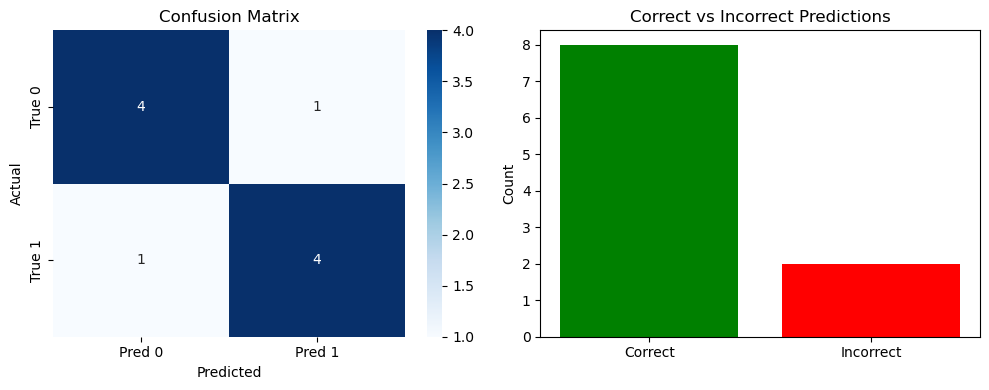

In [4]:
# Visualization: Accuracy with Confusion Matrix and Bar Plot
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Example data
y_true = [1, 0, 1, 1, 0, 1, 0, 0, 1, 0]
y_pred = [1, 0, 0, 1, 0, 1, 1, 0, 1, 0]

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Bar plot: correct vs incorrect
correct = sum(yt == yp for yt, yp in zip(y_true, y_pred))
incorrect = len(y_true) - correct
plt.subplot(1, 2, 2)
plt.bar(['Correct', 'Incorrect'], [correct, incorrect], color=['green', 'red'])
plt.title('Correct vs Incorrect Predictions')
plt.ylabel('Count')
plt.tight_layout()
plt.show()
